In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-detection/yes'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import os
import glob
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import cv2
import ipywidgets as wdg
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2024-04-03 18:06:58.865389: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 18:06:58.865504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 18:06:59.013877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
tumor=[]
no_tumor=[]
for file in glob.iglob('/kaggle/input/brain-tumor-detection/yes/*'):
    img = cv2.imread(file)                      #Reading the images from the path
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing the color from BGR to RGB
    img = cv2.resize(img, (150, 150)) 
    tumor.append((img, 1))

for file in glob.iglob('/kaggle/input/brain-tumor-detection/no/*'):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150)) 
    no_tumor.append((img, 0))

data=tumor+no_tumor
x=np.array([i[0] for i in data])
y=np.array([i[1] for i in data])

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_img(i):
    plt.figure(figsize=(7,7))
    plt.imshow(x[i])
    if y[i]==1:
        plt.title('Tumor')
    if y[i]==0:
        plt.title('No_Tumor')


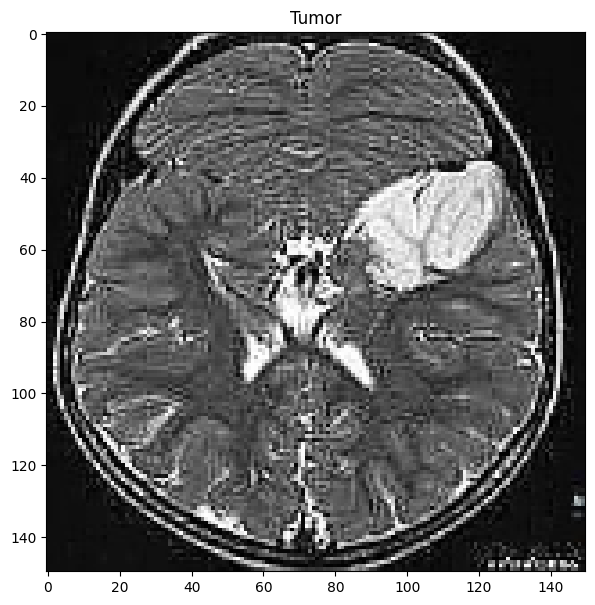

In [6]:
plot_img(300)

In [7]:
x,y=shuffle(x,y,random_state=101)

In [8]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=.15,random_state=42,stratify=y)

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),kernel_initializer='he_uniform', input_shape=(150,150,3),activation='relu'),
    #keras.layers.Conv2D(32,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(64,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512,(3,3),kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.4),
    #keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 11, 11, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             

 Total params: 5,573,057 (21.26 MB)

 Trainable params: 5,570,049 (21.25 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [13]:
class new_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.995:
            self.model.stop_training = True
            
stop_epoch= new_callback()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
model_hist=model.fit(x_train,y_train,epochs=50,callbacks=[stop_epoch])

Epoch 1/50


2024-04-03 18:07:43.571576: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.01362, expected 6.05938
2024-04-03 18:07:43.571632: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.59738, expected 5.64314
2024-04-03 18:07:43.571641: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.60386, expected 6.64961
2024-04-03 18:07:43.571649: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.47181, expected 6.51757
2024-04-03 18:07:43.571657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.76316, expected 6.80892
2024-04-03 18:07:43.571664: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.80827, expected 5.85402
2024-04-03 18:07:43.571672: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.93282, expected 5.97858
2024-04-03 18:07:43.571679: E external/local_xla/xla/se

 5/80 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5699 - loss: 3.1803

I0000 00:00:1712167673.351469      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6830 - loss: 1.2878

2024-04-03 18:07:58.775177: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.026, expected 6.07903
2024-04-03 18:07:58.775243: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.32727, expected 7.3803
2024-04-03 18:07:58.775252: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.958, expected 6.01103
2024-04-03 18:07:58.775262: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.23443, expected 7.28746
2024-04-03 18:07:58.775269: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.52175, expected 6.57477
2024-04-03 18:07:58.775277: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.64679, expected 5.69982
2024-04-03 18:07:58.775285: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 7.19936, expected 6.25239
2024-04-03 18:07:58.775292: E external/local_xla/xla/service

80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 200ms/step - accuracy: 0.6846 - loss: 1.2745
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8096 - loss: 0.4772
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8566 - loss: 0.3460
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9163 - loss: 0.2480
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9309 - loss: 0.1786
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9477 - loss: 0.1287
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9554 - loss: 0.1364
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9644 - loss: 0.0898
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9851 - loss: 0.0500
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9672 - loss: 0.0873
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9877 - loss: 0.0276
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9828 -

In [16]:
model.evaluate(x_test,y_test)

13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9868 - loss: 0.0889

2024-04-03 18:08:52.473838: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43808: 6.8125, expected 5.92933
2024-04-03 18:08:52.473891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43809: 6.37202, expected 5.48885
2024-04-03 18:08:52.473900: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43810: 6.13308, expected 5.24991
2024-04-03 18:08:52.473908: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43811: 7.23825, expected 6.35508
2024-04-03 18:08:52.473916: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43812: 7.32293, expected 6.43977
2024-04-03 18:08:52.473923: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43814: 7.19398, expected 6.31082
2024-04-03 18:08:52.473931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43815: 7.41525, expected 6.53209
2024-04-03 18:08:52.473938: 

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9868 - loss: 0.0851


W0000 00:00:1712167733.467388      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.06679530441761017, 0.9866666793823242]

In [17]:
y_pred=model.predict(x_test)
y_pred=np.round(y_pred,0)
y_pred[:5]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       225
           1       0.99      0.99      0.99       225

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



<Axes: >

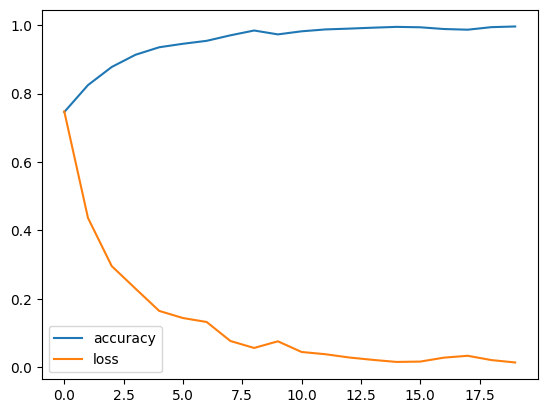

In [19]:
pd.DataFrame(model_hist.history).plot()